In [ ]:
fpath_dict = {
    "2ms": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2406_D25-M3-S0-L8_4_1.tif",
    "3ms": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2406_D25-M3-S0-L8_5_1.tif",
    "5ms": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2406_D25-M3-S0-L8_6_1.tif",
    "20ms": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2406_D25-M3-S0-L8_14_1.tif",
    "500ms": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2406_D25-M3-S0-L8_17_1.tif",
}

In [ ]:
from disentangle.core.tiff_reader import load_tiff

data_dict = {}
for key in fpath_dict.keys():
    fpath = fpath_dict[key]
    data_dict[key] = load_tiff(fpath)

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

In [ ]:
# GT
import ml_collections as ml
from disentangle.core.data_type import DataType
from disentangle.data_loader.nikola_7D_rawdata_loader import NikolaChannelList
from disentangle.data_loader.train_val_data import get_train_val_data
from disentangle.core.data_split_type import DataSplitType

datadir = "/group/jug/ashesh/data/nikola_data/20240531/"
GT_dict = {}
config = ml.ConfigDict()
config.data = ml.ConfigDict()
config.data.enable_gaussian_noise = False
config.data.data_type = DataType.NicolaData
config.data.channel_idx_list = [NikolaChannelList.Ch_B, NikolaChannelList.Ch_C, NikolaChannelList.Ch_D]
config.training = ml.ConfigDict()

for key in ["2ms", "3ms", "5ms", "20ms", "500ms"]:
    config.data.dset_type = key
    data_GT = get_train_val_data(
        config.data,
        datadir,
        DataSplitType.Test,
        val_fraction=0.1,
        test_fraction=0.1,
    )
    GT_dict[key] = data_GT


Loading from /group/jug/ashesh/data/nikola_data/20240531/Set1/uSplit_2ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set2/uSplit_2ms.nd2
ND2 dimensions: {'P': 11, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set3/uSplit_2ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set4/uSplit_2ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set5/uSplit_2ms.nd2
ND2 dimensions: {'P': 21, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set6/uSplit_2ms.nd2
ND2 dimensions: {'P': 20, 'C

In [5]:
data_GT.shape

(10, 1608, 1608, 3)

/group/jug/ashesh/naturemethods/snr/htlif24_perf_variation_with_snr.eps


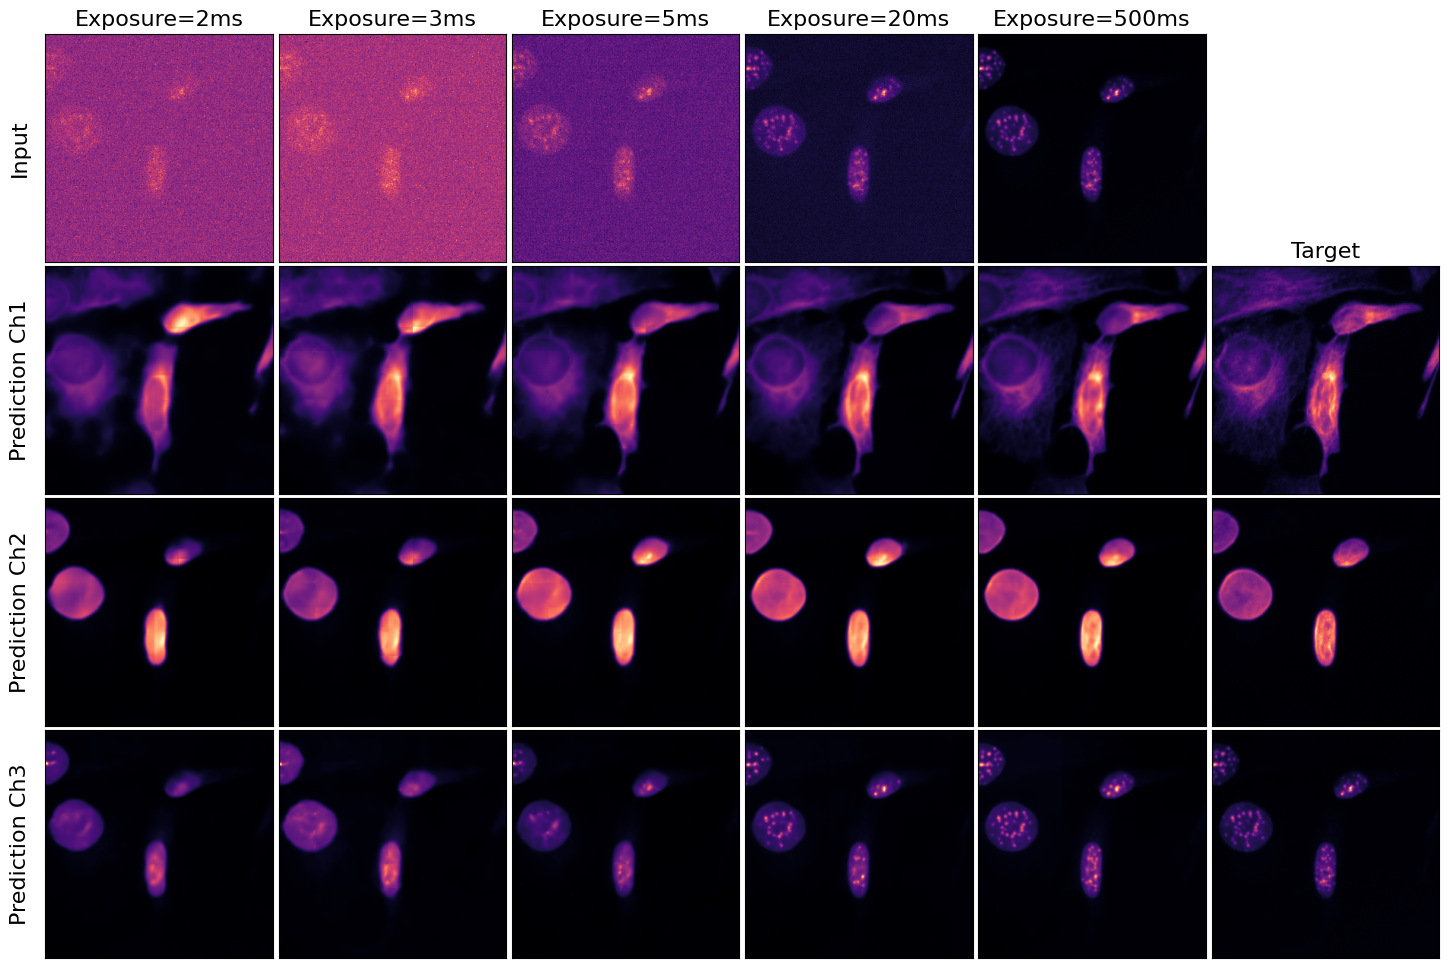

In [ ]:
import matplotlib.pyplot as plt
from disentangle.analysis.plot_utils import clean_ax

imgsz = 3
_, ax = plt.subplots(figsize=(6 * imgsz, 4 * imgsz), ncols=6, nrows=4)
fontsize = 16
img_idx = 0
hs = 0
ws = 0
hN = 300
wN = 300
ax[0, 0].set_ylabel("Input", fontsize=fontsize)

for i, key in enumerate(["2ms", "3ms", "5ms", "20ms", "500ms"]):
    # input
    ax[0, i].imshow(GT_dict[key][img_idx, hs : hs + hN, ws : ws + wN, -1], cmap="magma")

    # prediction
    for cidx in range(3):
        ax[cidx + 1, i].imshow(data_dict[key][img_idx, hs : hs + hN, ws : ws + wN, cidx], cmap="magma")
        # ax[cidx+1, i].axis('off')

    ax[0, i].set_title(f"Exposure={key}", fontsize=fontsize)

for cidx in range(3):
    ax[1 + cidx, 5].imshow(data_GT[img_idx, hs : hs + hN, ws : ws + wN, cidx], cmap="magma")
    # ax[1+cidx, 5].axis('off')

ax[0, 5].axis("off")
ax[1, 5].set_title("Target", fontsize=fontsize)

ax[0, 0].set_ylabel("Input", fontsize=fontsize)
ax[1, 0].set_ylabel("Prediction Ch1", fontsize=fontsize)
ax[2, 0].set_ylabel("Prediction Ch2", fontsize=fontsize)
ax[3, 0].set_ylabel("Prediction Ch3", fontsize=fontsize)
clean_ax(ax)
# reduce the space between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)

fpath = "/group/jug/ashesh/naturemethods/snr/htlif24_perf_variation_with_snr.eps"
plt.savefig(fpath, dpi=300, format="eps", bbox_inches="tight")
print(fpath)

In [ ]:
! ls 